# Notebook exercise: Sampling methods for EVA

In this interactive notebook you will try two different methods to extract extreme observations from a timesereis. 

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen and then wait until all cells are executed.

**Learning objectives:**
Extract extreme observations using:
- Block Maxima (filter on yearly extremes)
- Peak Over Threshold (Filter values by threshold, chosen with the mean-residual-life method)

## Assignment 1: Block Maxima 

In this assignment, you will have the following tasks:
1. Extract yearly maxima from the dataset 
2. Apply GEV (Generalized Extreme Value) $\rightarrow$ see MUDE book
3. Determine the return value for a return period of 100 years

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

wavedata = pd.read_csv('data/Wavedata.csv')
display(wavedata.head())

,datetime,Hs
0,01/01/2005 00:00,1.125488
1,01/01/2005 03:00,1.119873
2,01/01/2005 06:00,1.176270
3,01/01/2005 09:00,1.173584
4,01/01/2005 12:00,0.594238


### 1. Extract yearly maxima from the dataset

In [4]:
annual_max = # YOUR CODE HERE

print(annual_max.head())

SyntaxError: invalid syntax (3156033927.py, line 3)

### 2. Fit the GEV distribution to the selected yearly maxima. 

Calculate the 100-year return value for annual maxima with:

$$ 
p = 1 - 1.0/T 
$$, 

with T = Return Period (years) and:

$$
t(x) =
\begin{cases}
\left[1 + \xi \left(\dfrac{x - \mu}{\sigma}\right)\right]^{1/\xi}, & \xi \neq 0, \\[12pt]
\exp\!\left(\dfrac{x - \mu}{\sigma}\right), & \xi = 0.
\end{cases}
$$


Hint: use `scipy.stats.genextreme.fit()` function to extract the relevant parameters of the GEV distribution

In [10]:
c, loc, scale = # YOUR CODE HERE   

xi = -c  # shape parameter
mu = loc  # location parameter
sigma = scale  # scale parameter

T = # YOUR CODE HERE
t = # YOUR CODE HERE

print(f'GEV fit parameters:')
print(f'  location μ = {mu:.4f}')
print(f'  scale    σ = {sigma:.4f}')
print(f'  shape    ξ = {xi:.4f}  (note: SciPy returns c = -ξ)\n')
print()
print(f'The GEV value for a return period of {T} years is {t:.4f} m')

SyntaxError: invalid syntax (496319010.py, line 3)

### 3. Plot the results

plot the pdf of the distribution with a histogram (left) and cdf with empirical points (right)

hint: use `scipy.stats.genextreme.pdf()` and `scipy.stats.genextreme.cdf()`

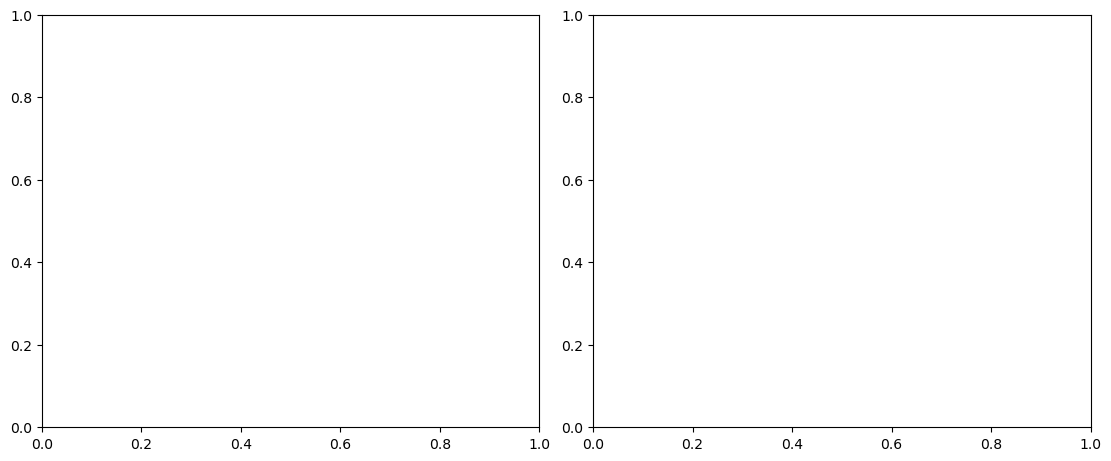

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), constrained_layout=True)

# Left: histogram + pdf
ax = axes[0]

# YOUR CODE HERE

# Right: empirical cdf + fitted cdf
ax = axes[1]

# YOUR CODE HERE

plt.show()

## Assignment 2: Peak-Over-Threshold

In this assignment, you will have the following tasks:
1. Extract maxima from the dataset using a Threshold ($th = 2.5m$) and a Declustering Time ($dl = 48h$)
2. Apply GPD (Generalized Pareto Distribution) $\rightarrow$ see MUDE book
3. Determine the return value for a return period of 100 years

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

wavedata = pd.read_csv('data/Wavedata.csv')
display(wavedata.head())

,datetime,Hs
0,01/01/2005 00:00,1.125488
1,01/01/2005 03:00,1.119873
2,01/01/2005 06:00,1.176270
3,01/01/2005 09:00,1.173584
4,01/01/2005 12:00,0.594238


### 1. Extract maxima from the dataset that exceed the Threshold ($th = 2.5m$), with a Declustering Time ($dl = 48h$)

In [9]:
u = 2.5                     # threshold [m]
dl_hours = 48               # declustering window [hours]

exc = # YOUR CODE HERE
if exc.empty:
    raise ValueError("No exceedances found above the threshold.")

clusters = # YOUR CODE HERE
peaks = # YOUR CODE HERE
peaks_times = # YOUR CODE HERE

print(f'Number of exceedance clusters: {len(peaks)}')
print(f'First few peak times and values:\n{pd.Series(peaks.values, index=peak_times.values).head()}\n')

SyntaxError: invalid syntax (3114826601.py, line 4)

### 2. Fit the GPD distribution to the selected maxima. 

Calculate the 100-year return value for the selected maxima with:

$$
f(x) =
\begin{cases}
\dfrac{1}{\sigma}\left[1 + \xi\left(\dfrac{x - \mu}{\sigma}\right)\right]^{-1/\xi - 1}, & \xi \neq 0, \\[12pt]
\dfrac{1}{\sigma}\exp\!\left(-\dfrac{x - \mu}{\sigma}\right), & \xi = 0.
\end{cases}
$$

Hint: use `scipy.stats.genpareto.fit()` function to extract the relevant parameters of the GEV distribution

In [12]:
xi, loc, beta = # YOUR CODE HERE

T = # YOUR CODE HERE
t = # YOUR CODE HERE

print('GPD fit parameters (exceedances):')
print(f'  scale  β = {beta:.4f}')
print(f'  shape  ξ = {xi:.4f}')
print(f'  loc    = {loc:.4f} (fixed at 0)\n')
print()
print(f'The GPD value for a return period of {T} years is {t:.4f} m')

SyntaxError: invalid syntax (2850242245.py, line 1)

### 3. Plot the results

plot the pdf of the distribution with a histogram (left) and cdf with empirical points (right)

hint: use `scipy.stats.genpareto.pdf()` and `scipy.stats.genpareto.cdf()`

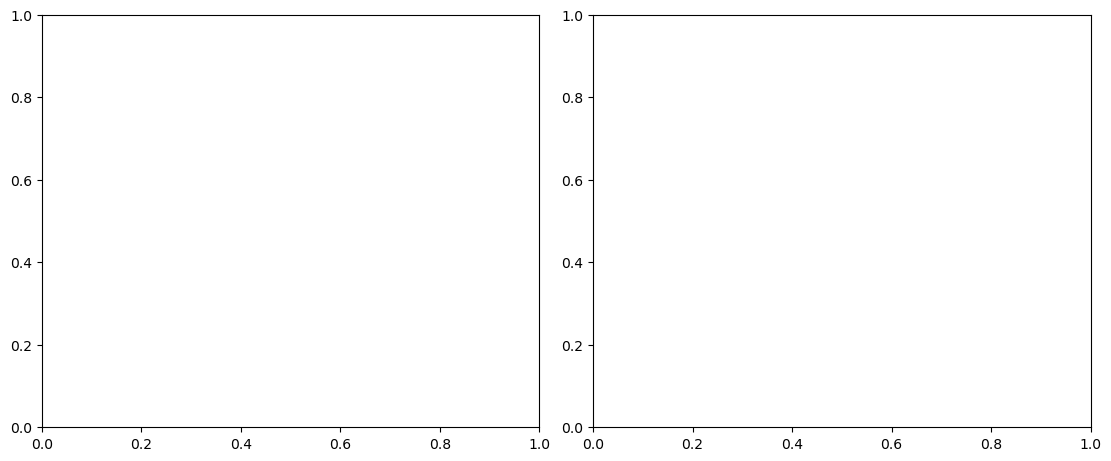

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), constrained_layout=True)

# Left: histogram + pdf
ax = axes[0]

# YOUR CODE HERE

# Right: empirical cdf + fitted cdf
ax = axes[1]

# YOUR CODE HERE

plt.show()